<a href="https://colab.research.google.com/github/qnhhoa/DecisionSupportSystem/blob/main/Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import seaborn as sns

%matplotlib inline

In [ ]:
DOWNLOAD_URL = 'https://raw.githubusercontent.com/qnhhoa/DecisionSupportSystem/main/train.csv'
DATASET_DIR_PATH = '/content/drive/MyDrive/Colab Notebooks/DSS' # [directory path] để save dataset trên google drive
DATASET_PATH = os.path.join(DATASET_DIR_PATH, 'passenger_satis_raw.csv')

Download and save dataset

In [ ]:
def fetch_data(download_url, dataset_path):
    try:
        urllib.request.urlretrieve(download_url, dataset_path)
    except:
        print(f"failed to download and save dataset in {dataset_path}")

In [ ]:
fetch_data(DOWNLOAD_URL, DATASET_PATH)

# **Data Preprocessing**


In [ ]:
# load dataset
df = pd.read_csv(DATASET_PATH)

In [ ]:
# copy data ra một biến khác để đảm bảo an toàn cho dữ liệu
df_cp = df.copy()

# **EDA - Exploratory Data Analysis**

# Decribe data

In [ ]:
# kiểm tra 5 dòng đầu
df_cp.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# check info
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df_cp.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


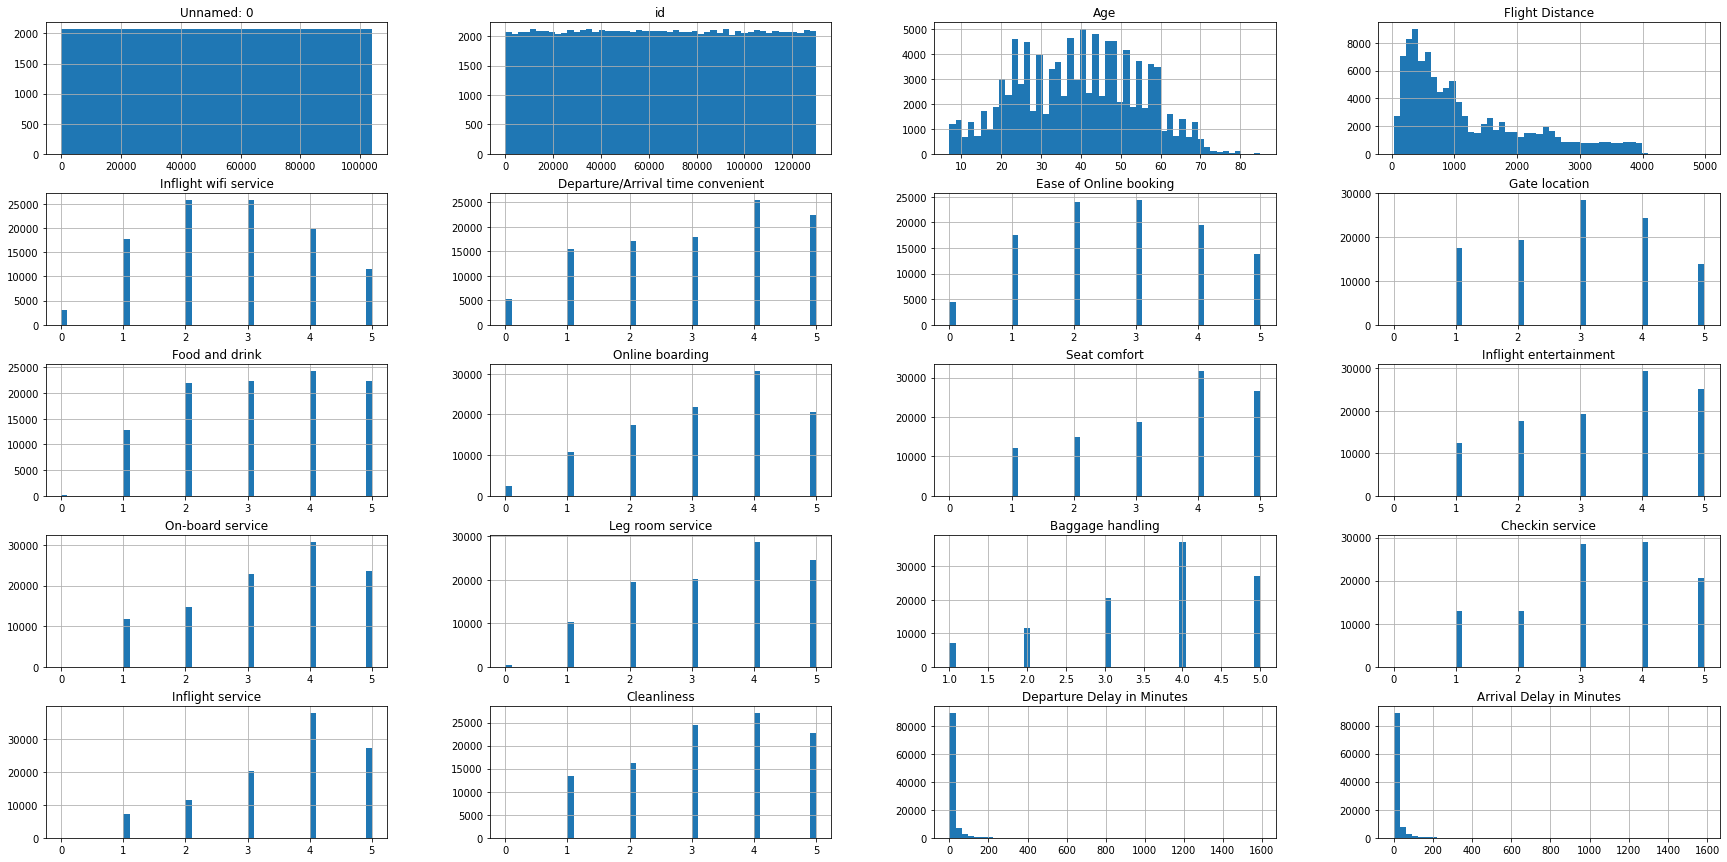

In [ ]:
# check phân bố dữ liệu
df_cp.hist(bins=50,figsize=(30, 15))
plt.show()

# Outliers

In [ ]:
# Lấy ra những cột dạng numeric trong data
numeric = df_cp.select_dtypes(exclude='object')
numeric

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [ ]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['Unnamed: 0', 'id', 'Exited']]
cols_to_check

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

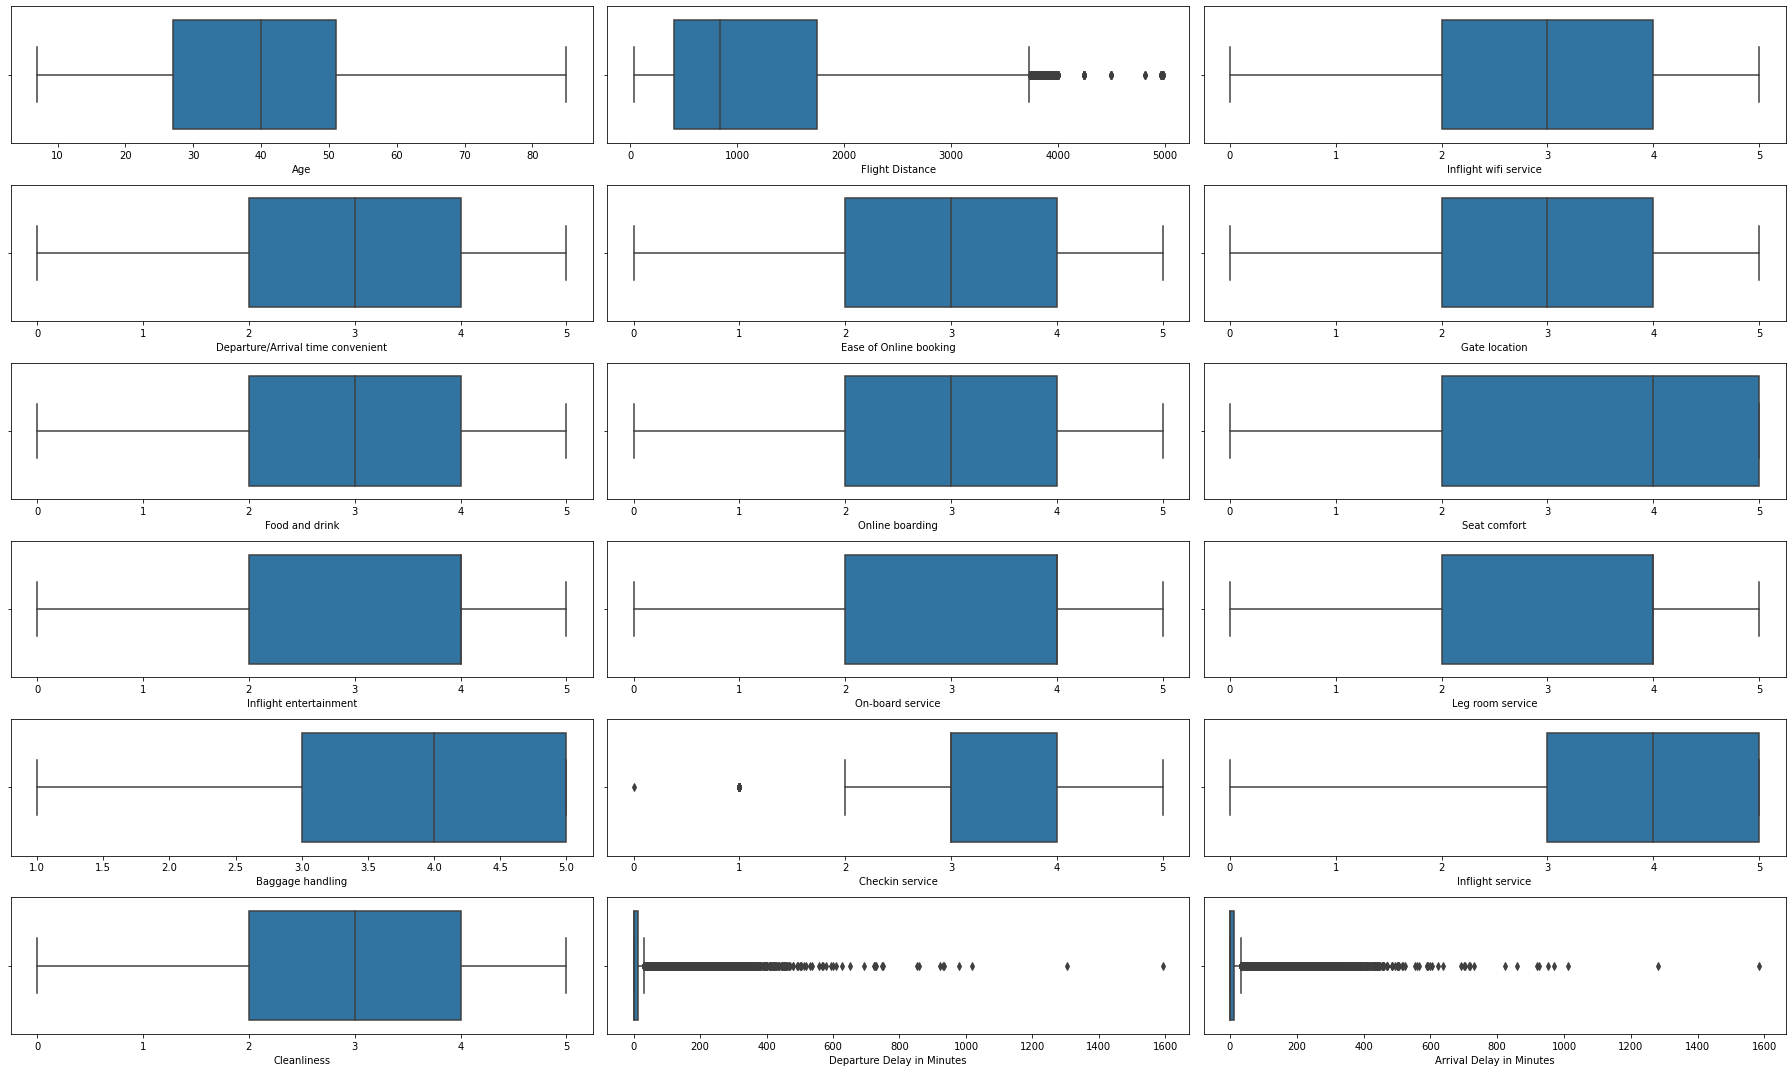

In [ ]:
# visualize outliers sử dụng boxplot
fig, ax = plt.subplots(6, 3, figsize = (25, 15))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df[c], ax = ax[i])
fig.tight_layout()

# Missing Data

In [ ]:
# check dữ liệu NaN
missing_data = df_cp.isna().sum().reset_index()
missing_data.columns = ["features", "total_missing"]
missing_data

,features,total_missing
0,Unnamed: 0,0
1,id,0
2,Gender,0
3,Customer Type,0
4,Age,0
5,Type of Travel,0
6,Class,0
7,Flight Distance,0
8,Inflight wifi service,0
9,Departure/Arrival time convenient,0


In [ ]:
# Xử lý dữ liệu Null
class HandlingNullData:
    def __init__(self, handle=True): # no *args or **kargs
        self.handle = handle
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        cp_df = X.copy()
        if 'Arrival Delay in Minutes' in X.columns:
          median = cp_df['Arrival Delay in Minutes'].median()
          cp_df['Arrival Delay in Minutes'].fillna(median, inplace=True)
        return cp_df

# Data Cleaning

In [ ]:
# xóa dữ liệu null
df_cp = df_cp.dropna()

In [ ]:
df_cp.drop(columns=['Unnamed: 0'])

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# **Feature Engineering**

# Encode features

In [ ]:
# check giá trị Geography feature
df_cp["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
# check giá trị Geography feature
df_cp["Gender"].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [ ]:
# check giá trị Geography feature
df_cp["Class"].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [ ]:
# check giá trị Geography feature
df_cp["Type of Travel"].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [ ]:
# check giá trị Geography feature
df_cp["Customer Type"].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# encoder column
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Class']]).toarray())
encoder_df.columns = df_cp["Class"].unique()

# join to original df
df_cp = df_cp.join(encoder_df)

In [ ]:
df_cp['Gender'] = df_cp["Gender"].map({value:idx for idx, value in enumerate(df_cp["Gender"].value_counts().index)})
df_cp['Customer Type'] = df_cp["Customer Type"].map({value:idx for idx, value in enumerate(df_cp["Customer Type"].value_counts().index)})
df_cp['Type of Travel'] = df_cp["Type of Travel"].map({value:idx for idx, value in enumerate(df_cp["Type of Travel"].value_counts().index)})
df_cp['satisfaction'] = df_cp["satisfaction"].map({value:idx for idx, value in enumerate(df_cp["satisfaction"].value_counts().index)})

In [ ]:
# results
df_cp.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Eco Plus,Business,Eco
0,0,70172,1,0,13,1,Eco Plus,460,3,4,...,4,4,5,5,25,18.0,0,0.0,0.0,1.0
1,1,5047,1,1,25,0,Business,235,3,2,...,3,1,4,1,1,6.0,0,1.0,0.0,0.0
2,2,110028,0,0,26,0,Business,1142,2,2,...,4,4,4,5,0,0.0,1,1.0,0.0,0.0
3,3,24026,0,0,25,0,Business,562,2,5,...,3,1,4,2,11,9.0,0,1.0,0.0,0.0
4,4,119299,1,0,61,0,Business,214,3,3,...,4,3,3,3,0,0.0,1,1.0,0.0,0.0
5,5,111157,0,0,26,1,Eco,1180,3,4,...,4,4,4,1,0,0.0,0,0.0,1.0,0.0
6,6,82113,1,0,47,1,Eco,1276,2,4,...,4,3,5,2,9,23.0,0,0.0,1.0,0.0
7,7,96462,0,0,52,0,Business,2035,4,3,...,5,4,5,4,4,0.0,1,1.0,0.0,0.0
8,8,79485,0,0,41,0,Business,853,1,2,...,1,4,1,2,0,0.0,0,1.0,0.0,0.0
9,9,65725,1,1,20,0,Eco,1061,3,3,...,4,4,3,2,0,0.0,0,0.0,1.0,0.0


# Feature Selection

### Chi-square test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
categorical_features = df_cp[["Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]]

In [ ]:
best_features = SelectKBest(chi2, k=21)
best_features.fit(categorical_features, df_cp["satisfaction"])

SelectKBest(k=21, score_func=<function chi2 at 0x7f46aa6bbf80>)

In [ ]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
10,0.000000e+00,6384.881308,Seat comfort
18,0.000000e+00,13729.291096,Eco Plus
17,0.000000e+00,5050.652286,Cleanliness
16,0.000000e+00,2357.583714,Inflight service
15,0.000000e+00,2793.894782,Checkin service
14,0.000000e+00,2443.599801,Baggage handling
13,0.000000e+00,5245.904571,Leg room service
12,0.000000e+00,5284.790125,On-board service
11,0.000000e+00,8691.512615,Inflight entertainment
20,0.000000e+00,11603.258832,Business


In [ ]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0                                Gender
1                         Customer Type
2                                   Age
3                        Type of Travel
4                 Inflight wifi service
5     Departure/Arrival time convenient
6                Ease of Online booking
8                        Food and drink
9                       Online boarding
10                         Seat comfort
11               Inflight entertainment
12                     On-board service
13                     Leg room service
14                     Baggage handling
15                      Checkin service
16                     Inflight service
17                          Cleanliness
18                             Eco Plus
19                                  Eco
20                             Business
Name: columns, dtype: object

In [ ]:
# chọn ra những features > alpha
df_score[df_score['p_values'] > 0.05]['columns']

7    Gate location
Name: columns, dtype: object

## ANOVA F-test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
df_cp = df_cp.dropna()

In [ ]:
continous_features  = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]]

In [ ]:
best_features = SelectKBest(f_classif, k=3)
best_features.fit(continous_features , df_cp["satisfaction"])

SelectKBest(k=3)

In [ ]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
0,0.000000e+00,10164.144626,Flight Distance
2,8.391470e-77,344.619158,Arrival Delay in Minutes
1,1.638513e-59,265.019573,Departure Delay in Minutes


In [ ]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0               Flight Distance
1    Departure Delay in Minutes
2      Arrival Delay in Minutes
Name: columns, dtype: object

## Data Scaling
Mục tiêu: Apply Data Normalization lên các continous features [Age, Flight Distance]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cols_to_scale = ["Age", "Flight Distance"]
scaler = MinMaxScaler()
df_cp[cols_to_scale] = scaler.fit_transform(df_cp[cols_to_scale])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
# result
df_cp[cols_to_scale]

,Age,Flight Distance
0,0.076923,0.086632
1,0.230769,0.041195
2,0.243590,0.224354
3,0.230769,0.107229
4,0.692308,0.036955
...,...,...
103899,0.205128,0.032512
103900,0.538462,0.467690
103901,0.294872,0.396607
103902,0.192308,0.195679


chuyển từ dataframe sang numpy

In [ ]:
input = df_cp[["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes", "Gender", "Customer Type",	"Age",	"Type of Travel",	"Inflight wifi service",	"Departure/Arrival time convenient",	"Ease of Online booking",
                              "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Eco Plus", "Eco", "Business"]].to_numpy()

In [ ]:
input.shape

(103594, 24)

In [ ]:
y = df_cp["satisfaction"].to_numpy()

In [ ]:
y.shape

(103594,)